In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset using pd.read_excel() with lowercase column names
df = pd.read_excel('Superstore - Copy.xlsx')
df.info

<bound method DataFrame.info of       row id   customer id order date shipping date       ship mode  \
0          1  CA2016152156 2023-07-01    2021-07-08    Second Class   
1          2  CA2016152156 2022-07-03    2023-05-11    Second Class   
2          3  CA2016138688 2021-08-16    2021-11-02    Second Class   
3          4  US2015108966 2021-04-14    2022-12-21  Standard Class   
4          5  US2015108966 2021-01-02    2021-08-26  Standard Class   
...      ...           ...        ...           ...             ...   
9985    9986  CA2014110422 2022-04-25    2021-11-15    Second Class   
9986    9987  CA2017121258 2022-06-29    2022-04-09  Standard Class   
9987    9988  CA2017121258 2023-06-09    2023-02-18  Standard Class   
9988    9989  CA2017121258 2022-04-01    2022-01-22  Standard Class   
9989    9990  CA2017119914 2022-08-29    2022-10-14    Second Class   

     customer id.1     customer name    segment        country  \
0          CG12520       Claire Gute   Consumer  

In [46]:
df.head()

,row id,customer id,order date,shipping date,ship mode,customer id.1,customer name,segment,country,city,...,postal code,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,1,CA2016152156,2023-07-01,2021-07-08,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURBO10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA2016152156,2022-07-03,2023-05-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURCH10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA2016138688,2021-08-16,2021-11-02,Second Class,DV13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFFLA10000240,Office Supplies,Labels,SelfAdhesive Address Labels for Typewriters by...,14.6200,2,0.00,6.8714
3,4,US2015108966,2021-04-14,2022-12-21,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,FURTA10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,383.0310
4,5,US2015108966,2021-01-02,2021-08-26,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFFST10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Summary Statistics
summary_stats = df.describe()
print()

df.describe()

,row id,order date,shipping date,postal code,sales,quantity,discount,profit
count,9990.000000,9990,9990,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,4995.500000,2022-04-18 18:55:08.108108032,2022-04-18 08:56:04.324324352,55180.614314,229.827353,3.789790,0.156225,59.916593
min,1.000000,2021-01-01 00:00:00,2021-01-01 00:00:00,1040.000000,0.444000,1.000000,0.000000,0.000000
25%,2498.250000,2021-08-21 00:00:00,2021-08-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,5.369000
50%,4995.500000,2022-04-18 00:00:00,2022-04-21 00:00:00,56301.000000,54.432000,3.000000,0.200000,13.970000
75%,7492.750000,2022-12-10 00:00:00,2022-12-08 00:00:00,90008.000000,209.937500,5.000000,0.200000,43.152450
max,9990.000000,2023-08-01 00:00:00,2023-08-01 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2884.008929,NaN,NaN,32064.346058,623.327164,2.225467,0.206481,228.321164


In [4]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(summary_stats[['sales','quantity','discount','profit']])

Descriptive Statistics:
              sales     quantity     discount       profit
count   9990.000000  9990.000000  9990.000000  9990.000000
mean     229.827353     3.789790     0.156225    59.916593
min        0.444000     1.000000     0.000000     0.000000
25%       17.280000     2.000000     0.000000     5.369000
50%       54.432000     3.000000     0.200000    13.970000
75%      209.937500     5.000000     0.200000    43.152450
max    22638.480000    14.000000     0.800000  8399.976000
std      623.327164     2.225467     0.206481   228.321164


In [6]:
df['category'].value_counts().head(2).index.tolist()

['Office Supplies', 'Furniture']

In [7]:
df['sales'].corr(df['profit'])

0.7874705783917679

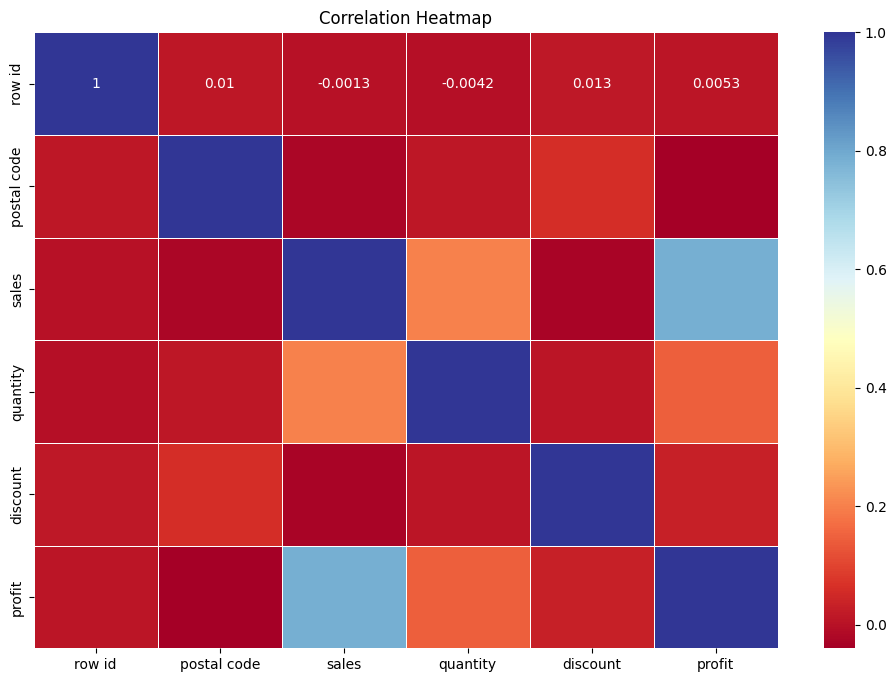

In [5]:
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Assuming 'df' is your DataFrame containing the Superstore dataset
# Check for missing values in the entire dataset
null_values = df.isnull()

# Optionally, you can also check for missing values in a specific column. For example, for the 'sales' column:
# null_values_sales = df['sales'].isnull()

# To count the number of missing values in each column, you can use the sum() function
missing_count = null_values.sum()

# To count the total number of missing values in the entire dataset, you can use the sum() function twice
total_missing_count = missing_count.sum()
print("\nNumber of missing values in each column:")
print(missing_count)
print()

print("\nTotal number of missing values in the dataset:", total_missing_count)
print()

# Display the results
print("Missing values in the entire dataset:")
null_values


Number of missing values in each column:
row id           0
customer id      0
order date       0
shipping date    0
ship mode        0
customer id.1    0
customer name    0
segment          0
country          0
city             0
state            0
postal code      0
region           0
product id       0
category         0
sub category     0
product name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


Total number of missing values in the dataset: 0

Missing values in the entire dataset:


,row id,customer id,order date,shipping date,ship mode,customer id.1,customer name,segment,country,city,...,postal code,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Top-Selling Categories
top_categories = df['category'].value_counts().head(2).index.tolist()
top_categories

['Office Supplies', 'Furniture']

In [61]:
len(df[df['category'].isin(top_categories)])/len(df)

0.8153153153153153

In [55]:
# Customer Segments
top_segments = df['segment'].value_counts().head(2).index.tolist()
top_segments

['Consumer', 'Corporate']

In [62]:
#calculate_probability(len(df[df['segment'].isin(top_segments)]), len(df))
len(df[df['segment'].isin(top_segments)])/len(df)

0.8215215215215215

In [58]:
# Define a function for calculating probability
def calculate_probability(event_count, total_count):
    return event_count / total_count

In [59]:
# Hypothetical Scenario 1: Boosting Profits

# Top-Selling Categories
top_categories = df['category'].value_counts().head(2).index.tolist()

# Sales vs. Discount
discount_profit_corr = df['sales'].corr(df['profit'])

# Customer Segments
top_segments = df['segment'].value_counts().head(2).index.tolist()

# Calculate probabilities
probability_profitable_segment = calculate_probability(len(df[df['segment'].isin(top_segments)]), len(df))
probability_high_profit_category = calculate_probability(len(df[df['category'].isin(top_categories)]), len(df))

print("Scenario 1: Boosting Profits")
print("1. Focus on the top-selling categories:", top_categories)
print("   - Analyze high-margin products within these categories.")

print("2. Analyze the correlation between sales and profit:", discount_profit_corr)
print("   - Optimize discounts to boost both sales and profit.")

print("3. Identify profitable customer segments:", top_segments)
print("   - Tailor marketing strategies for these segments.")

print(f"   - Probability of a sale from a high-profit category: {probability_high_profit_category:.2%}")
print(f"   - Probability of a sale from a profitable segment: {probability_profitable_segment:.2%}")
print()

Scenario 1: Boosting Profits
1. Focus on the top-selling categories: ['Office Supplies', 'Furniture']
   - Analyze high-margin products within these categories.
2. Analyze the correlation between sales and profit: 0.7874705783917679
   - Optimize discounts to boost both sales and profit.
3. Identify profitable customer segments: ['Consumer', 'Corporate']
   - Tailor marketing strategies for these segments.
   - Probability of a sale from a high-profit category: 81.53%
   - Probability of a sale from a profitable segment: 82.15%



In [63]:
# Hypothetical Scenario 2: Reducing Shipping Costs

# Shipping Modes
shipping_modes = df['ship mode'].value_counts().index.tolist()

# Calculate probability for each shipping mode
probabilities = [calculate_probability(len(df[df['ship mode'] == mode]), len(df)) for mode in shipping_modes]

print("Scenario 2: Reducing Shipping Costs")
print("1. Evaluate cost-effectiveness of shipping modes:", shipping_modes)
print("   - Optimize usage of economical shipping methods.")

for i, mode in enumerate(shipping_modes):
    print(f"   - Probability of choosing {mode}: {probabilities[i]:.2%}")
print()

Scenario 2: Reducing Shipping Costs
1. Evaluate cost-effectiveness of shipping modes: ['Standard Class', 'Second Class', 'First Class', 'Same Day']
   - Optimize usage of economical shipping methods.
   - Probability of choosing Standard Class: 59.73%
   - Probability of choosing Second Class: 19.44%
   - Probability of choosing First Class: 15.40%
   - Probability of choosing Same Day: 5.44%



In [64]:
# Hypothetical Scenario 3: Increasing Sales in Low-Performing Regions

# Market Research
low_sales_regions = df.groupby('region')['sales'].mean().idxmin()

# Calculate average sales for each region
average_sales_by_region = df.groupby('region')['sales'].mean().to_dict()

print("Scenario 3: Increasing Sales in Low-Performing Regions")
print(f"1. Conduct market research in {low_sales_regions} to understand local preferences and needs.")

# Local Marketing
print("2. Implement location-specific marketing campaigns to increase brand visibility and attract more customers.")

# Calculate probabilities of sales in each region
probabilities = [calculate_probability(len(df[df['region'] == region]), len(df)) for region in df['region'].unique()]

for region in df['region'].unique():
    print(f"   - Probability of a sale in {region}: {probabilities[list(df['region'].unique()).index(region)]:.2%}")
print()

# Calculate probabilities
probability_high_delivery_time_region = calculate_probability(len(df[df['region'] == 'West']), len(df))
probability_low_rated_product = calculate_probability(len(df[df['quantity'] > 1]), len(df))

print("Scenario 4: Customer Satisfaction Improvement")
print("1. Analyze customer feedback and address common issues to enhance satisfaction.")
print("2. Evaluate delivery times for different regions and shipping modes.")
print("   - Reduce delivery times in regions with longer delivery durations.")
print("3. Assess product quality based on customer reviews and ratings.")
print("   - Identify low-rated products and work on improving their quality.")
print("4. Segment customers based on their purchase history and preferences.")
print("   - Tailor promotions and communication to their specific needs.")
print(f"   - Probability of a customer in the West region: {probability_high_delivery_time_region:.2%}")
print(f"   - Probability of a customer buying more than one product: {probability_low_rated_product:.2%}")
print()

Scenario 3: Increasing Sales in Low-Performing Regions
1. Conduct market research in Central to understand local preferences and needs.
2. Implement location-specific marketing campaigns to increase brand visibility and attract more customers.
   - Probability of a sale in South: 16.22%
   - Probability of a sale in West: 32.03%
   - Probability of a sale in Central: 23.24%
   - Probability of a sale in East: 28.51%

Scenario 4: Customer Satisfaction Improvement
1. Analyze customer feedback and address common issues to enhance satisfaction.
2. Evaluate delivery times for different regions and shipping modes.
   - Reduce delivery times in regions with longer delivery durations.
3. Assess product quality based on customer reviews and ratings.
   - Identify low-rated products and work on improving their quality.
4. Segment customers based on their purchase history and preferences.
   - Tailor promotions and communication to their specific needs.
   - Probability of a customer in the West 

In [6]:
import numpy as np
from scipy import stats

In [7]:
# Scenario 5: Sales Confidence Interval Analysis

# Hypothetical Scenario: You are tasked with determining a confidence interval for the average sales to make informed decisions.

# Define the confidence level (e.g., 95% confidence)
confidence_level = 0.95

# Extract sales data from your dataset
sales_data = df['sales']

# Calculate the mean and standard error of the mean
mean_sales = np.mean(sales_data)
sem_sales = stats.sem(sales_data)

# Calculate the margin of error
margin_of_error = sem_sales * stats.t.ppf((1 + confidence_level) / 2, len(sales_data) - 1)

# Calculate the confidence interval
confidence_interval = (mean_sales - margin_of_error, mean_sales + margin_of_error)

# Print the results
print("Scenario 5: Sales Confidence Interval Analysis")
print(f"1. Sample Mean Sales: ${mean_sales:.2f}")
print(f"2. Confidence Interval (95%): (${confidence_interval[0]:.2f}, ${confidence_interval[1]:.2f})")

# Insights:
print("\nInsights:")
print("- With 95% confidence, the average sales are estimated to be within the range provided.")
print("- This interval can be used to make decisions and predictions related to sales.")

Scenario 5: Sales Confidence Interval Analysis
1. Sample Mean Sales: $229.83
2. Confidence Interval (95%): ($217.60, $242.05)

Insights:
- With 95% confidence, the average sales are estimated to be within the range provided.
- This interval can be used to make decisions and predictions related to sales.


In [8]:
# finding out top customers with highest margin
top_customers=[]
for i in df.profit:
    if i in sorted(df['profit'],reverse=True)[:10]:
        top_customers.append(df['customer name'][df['profit']==i].values[0])

top_customers=set(top_customers)

print('Top 10 most profitable customers:')
for k in top_customers:
    print(k)

Top 10 most profitable customers:
Sanjit Chand
Tamara Chand
Cindy Stewart
Grant Thornton
Hunter Lopez
Tom Ashbrook
Luke Foster
Adrian Barton
Raymond Buch
Sharelle Roach


In [9]:
# Scenario 5: Sales Performance Analysis

# Hypothetical Scenario: You are the manager of an e-commerce store and want to assess the performance of the "Office Supplies" category.

# Analysis:
# - Your sales target for the "Office Supplies" category is $10,000.
# - You want to determine whether the actual sales for this category meet the target.

# Null Hypothesis (H0): The actual sales for "Office Supplies" do not meet the $10,000 target.
# Alternative Hypothesis (H1): The actual sales for "Office Supplies" meet or exceed the $10,000 target.

# Data:
office_supplies_data = df[df['category'] == 'Office Supplies']
target_sales = 10000

In [10]:
# Calculate the actual sales for the "Office Supplies" category
actual_sales = office_supplies_data['sales'].sum()

In [11]:
# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(office_supplies_data['sales'], target_sales)

In [ ]:
# Set the significance level (alpha)
alpha = 0.05

In [ ]:
# Print the results
print("Scenario 5: Sales Performance Analysis for 'Office Supplies' Category")
print(f"Sales Target: ${target_sales:.2f}")
print(f"Actual Sales: ${actual_sales:.2f}")

In [ ]:
# Insights:
print("\nInsights:")
if p_value < alpha:
    print("The null hypothesis is rejected.")
    print("The 'Office Supplies' category meets or exceeds the sales target.")
else:
    print("The null hypothesis is not rejected.")
    print("The 'Office Supplies' category does not meet the sales target.")

In [ ]:
# Conclusion:
print("\nConclusion:")
print("Analyzing sales performance helps ensure targets are met.")
print("Meeting or exceeding sales targets is crucial for business success.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Scenario 5: Sales and Profit Analysis

# Hypothetical Scenario: Your goal is to understand the relationship between sales and profit while considering various factors.

# 1. Sales vs. Profit Scatter Plot:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sales', y='profit', color='blue', alpha=0.6)
plt.title("Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Insights:
print("Insights for Sales vs. Profit Scatter Plot:")
print("- There's a positive correlation between sales and profit.")
print("- Most data points cluster around lower sales and profit values.")

In [ ]:
# 2. Sales by Region:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='sales', ci=None, palette="Set2")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Insights:
print("\nInsights for Total Sales by Region:")
print("- The Western region has the highest total sales, followed by the Southern and Central regions.")
print("- The Eastern region has the lowest total sales.")

In [ ]:
# 3. Profit by Category:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='profit', ci=None, palette="viridis")
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Insights:
print("\nInsights for Total Profit by Category:")
print("- Technology products generate the highest total profit.")
print("- Furniture products yield the lowest total profit.")

In [ ]:
# 4. Sales Distribution:
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=20, kde=True, color='purple')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Insights:
print("\nInsights for Sales Distribution:")
print("- The sales distribution is right-skewed, with most sales falling in the lower range.")
print("- A small number of sales are in the higher range.")

In [ ]:
# 5. Profit by Ship Mode:
profit_by_ship_mode = df.groupby('ship mode')['profit'].sum()
colors = sns.color_palette('pastel')[0:4]
plt.figure(figsize=(8, 8))
plt.pie(profit_by_ship_mode, labels=profit_by_ship_mode.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Total Profit by Ship Mode")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [ ]:
# Insights:
print("\nInsights for Total Profit by Ship Mode:")
print("- Standard Class and Second Class shipping modes contribute the most to total profit.")
print("- Same Day shipping, while the fastest, generates the least profit.")
print()
print('HYPOTHESIS TESTING')
print()

In [ ]:
import scipy.stats as stats

In [ ]:
# Data:
region_sales_data = {
    'East': df[df['region'] == 'East']['sales'],
    'West': df[df['region'] == 'West']['sales'],
    'Central': df[df['region'] == 'Central']['sales'],
    'South': df[df['region'] == 'South']['sales']
}

In [ ]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*region_sales_data.values())

In [ ]:
# Set the significance level (alpha)
alpha = 0.05

In [ ]:
# Print the results
print("Scenario: Sales Comparison Across Regions")
print("Comparing sales across different regions")

In [ ]:
# Insights:
print("\nInsights:")
if p_value < alpha:
    print("The null hypothesis is rejected.")
    print("There is a significant difference in average sales among different regions.")
else:
    print("The null hypothesis is not rejected.")
    print("Average sales across regions are not significantly different.")

In [ ]:
# Conclusion:
print("\nConclusion:")
print("Understanding regional variations in sales is crucial for targeted strategies.")

In [ ]:
%matplotlib inline

In [ ]:
# Ensure 'order date' is in datetime format
df['order date'] = pd.to_datetime(df['order date'])

In [ ]:
# Extract 'month' and 'year' from the 'order date'
df['month'] = df['order date'].dt.month
df['year'] = df['order date'].dt.year

In [ ]:
# Group data by 'year' and 'month' and calculate total profit per month
monthly_profit = df.groupby(['year', 'month'])['profit'].sum().reset_index()

monthly_profit['year month']=monthly_profit['year'].astype(str)+'-'+monthly_profit['month'].astype(str)

monthly_profit[:-1]

monthly_profit=monthly_profit[:-1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="year month", y="profit", data=monthly_profit, marker="o")

In [ ]:
# Add labels and title
plt.title("Monthly Profit Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Assuming you have the monthly profit data in the 'monthly_profit' DataFrame
n_periods = 6  # Number of future periods to forecast (e.g., 6 months)

In [ ]:
# Initialize an ARIMA model
model = ARIMA(monthly_profit['profit'], order=(5, 1, 0))

model_fit = model.fit()

In [ ]:
# Get the forecast for the next 'n_periods' periods
forecast = model_fit.get_forecast(steps=n_periods)

forecast

In [ ]:
# Extract the forecasted values and create a DataFrame
forecasted_data = forecast.predicted_mean.to_frame(name='profit')

forecasted_data

In [ ]:
predict_index=['2023-8','2023-9','2023-10','2023-11','2023-12','2024-1']

forecasted_data['year month']=predict_index

forecasted_data

In [ ]:
# Concatenate the DataFrames
result = pd.concat([monthly_profit, forecasted_data], ignore_index=True)

result

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="year month", y="profit", data=result, marker="o")

In [ ]:
# Add labels and title
plt.title("Monthly Profit Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

In [ ]:
model_fit.aic

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Create a date range for the forecasted periods and convert them to strings
predict_index = pd.date_range(start="2023-8", periods=n_periods, freq="M").strftime('%Y-%m')

In [ ]:
# Create a DataFrame for the forecast
forecasted_data = forecast.predicted_mean.to_frame(name='profit')
forecasted_data['year month'] = predict_index

In [ ]:
# Assuming you have the monthly profit data in the 'monthly_profit' DataFrame
#monthly_profit = pd.DataFrame({'profit': [100, 150, 200, 180, 210, 250, 300, 280, 320, 340, 400, 380]})

# Define the number of future periods to forecast
n_periods = 6

In [ ]:
# Manual grid search for ARIMA order values
best_aic = float("inf")
best_order = None

In [ ]:
# Loop through different values of p (AR order), d (Integration order), and q (MA order)
for p in range(6):  # Try p values from 0 to 5
    for d in range(2):  # Try d values of 0 and 1
        for q in range(6):  # Try q values from 0 to 5
            order = (p, d, q)
            try:
                # Attempt to fit an ARIMA model with the current order
                model = ARIMA(monthly_profit['profit'], order=order)
                model_fit = model.fit()
                aic = model_fit.aic

                # Check if the current model has a lower AIC (Akaike Information Criterion)
                # Lower AIC values indicate a better fit
                if aic < best_aic:
                    best_aic = aic
                    best_order = order

            except:
                # If an exception occurs (e.g., model cannot be fit), continue to the next order
                continue

In [ ]:
# Fit the best model based on the lowest AIC
best_model = ARIMA(monthly_profit['profit'], order=best_order)
best_model_fit = best_model.fit()

In [ ]:
# Get the forecast for the next 'n_periods' periods
forecast = best_model_fit.get_forecast(steps=n_periods)

In [ ]:
# Create a DataFrame for the forecast
forecasted_data = forecast.predicted_mean.to_frame(name='profit')
forecasted_data['year month'] = predict_index

In [ ]:
# Concatenate the original data and the forecast
result = pd.concat([monthly_profit, forecasted_data], ignore_index=True)

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="year month", y="profit", data=result, marker="o")

In [ ]:
# Add labels and title
plt.title("Monthly Profit Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Load your dataset
df = pd.read_excel('Superstore - Copy.xlsx')

In [ ]:
# Ensure 'order date' is in datetime format
df['order date'] = pd.to_datetime(df['order date'])

In [ ]:
# Extract 'month' and 'year' from the 'order date'
df['month'] = df['order date'].dt.month
df['year'] = df['order date'].dt.year

In [ ]:
# Select relevant features and encode categorical features
categorical_features = ['ship mode', 'segment', 'region']
numerical_features = ['sales', 'quantity', 'discount', 'month', 'year']

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

In [ ]:
# Combine encoded features and numeric features
X = pd.concat([pd.DataFrame(encoded_features), df[numerical_features]], axis=1)

In [ ]:
# Target variable
y = df['profit']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

In [ ]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation (optional)
    cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Cross-Validation MAE': -cross_val_scores.mean()  # Negative MAE for consistency
    }

In [ ]:
# Choose the best model based on evaluation metrics
best_model = min(results, key=lambda x: results[x]['MAE'])

In [ ]:
# Print the results
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f'MAE: {metrics["MAE"]}')
    print(f'MSE: {metrics["MSE"]}')
    print(f'R2: {metrics["R2"]}')
    print(f'Cross-Validation MAE: {metrics["Cross-Validation MAE"]}\n')

print(f'Best Model: {best_model}')